# Tasks
- Import the boston house  Dataset​
- Plot the regression line and interpret the slope.
- Use multiple linear regression on the same dataset to include additional features like number of rooms and age of house.
- ​Evaluate model performance using R^2 and RMSE.
- Compare the performance of simple vs multiple regression models and explain which performs better and why.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV



In [3]:
# Import the dataset using fetch_openml
from sklearn.datasets import fetch_openml
b_open = fetch_openml(name="boston", version=1, as_frame=True)
df = b_open.frame.copy()
print("Shape:", df.shape)
df.head()


Shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Step 2: Null and suplicates
print("Null ", df.isnull().sum())
print("duplicate rows:", df.duplicated().sum())


Null  CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
duplicate rows: 0


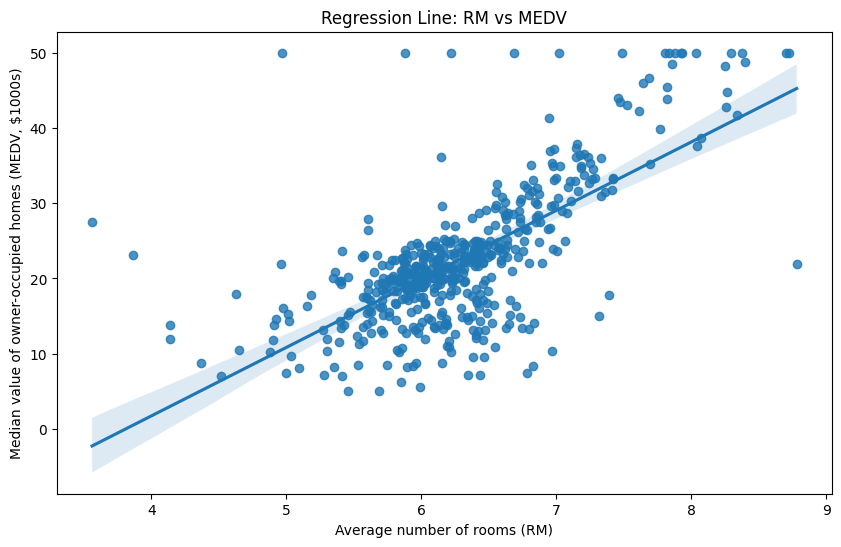

In [5]:
# Plot the regression line and interpret the slope.
X = df[['RM']] 
y = df['MEDV']  
plt.figure(figsize=(10, 6))
sns.regplot(x='RM', y='MEDV', data=df)
plt.title('Regression Line: RM vs MEDV')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV, $1000s)')
plt.show()


In [6]:
# Use simple linear regression on the same dataset to include all additional features.
X = df[['RM']] 
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² Score: 0.3708
Mean Squared Error: 46.1448


In [7]:
# Use multiple linear regression on the same dataset to include all additional features.
X = df[['RM', 'AGE', 'TAX', 'CRIM', 'ZN', 'INDUS', 'NOX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² Score: 0.5821
Mean Squared Error: 30.6493


In [8]:
# Compare the performance of simple vs multiple regression models and explain which performs better and why.
print("For simple Regression , R² Score: 0.3708, Mean Squared Error: 46.1448")
print("For multiple Regression, R² Score: 0.5821, Mean Squared Error: 30.6493")

print('The multiple regression model performs better because it considers more features that influence the target variable (MEDV) hence it improves predictive accuracy compared to the simple regression model that only uses RM.')


For simple Regression , R² Score: 0.3708, Mean Squared Error: 46.1448
For multiple Regression, R² Score: 0.5821, Mean Squared Error: 30.6493
The multiple regression model performs better because it considers more features that influence the target variable (MEDV) hence it improves predictive accuracy compared to the simple regression model that only uses RM.
